# Exploratory Data Analysis – Customer Churn

## Objective
Identify behavioral, contractual, and financial patterns that influence customer churn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
eda_df = pd.read_csv('../data/processed/churn_cleaned.csv')

# Convert to category for EDA
cat_cols = ['gender', 'PaymentMethod', 'Contract', 'InternetService']

for col in cat_cols:
    eda_df[col] = eda_df[col].astype('category')

In [3]:
eda_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [4]:
churn_rate = eda_df['Churn'].mean() * 100
churn_rate

np.float64(26.536987079369588)

## Tenure vs Churn

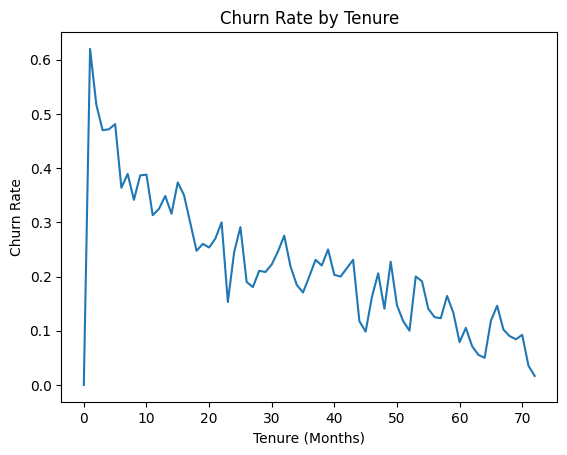

In [5]:
plt.figure()
eda_df.groupby('tenure')['Churn'].mean().plot()
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate')
plt.show()

## Monthy Charges vs Churn

<Figure size 640x480 with 0 Axes>

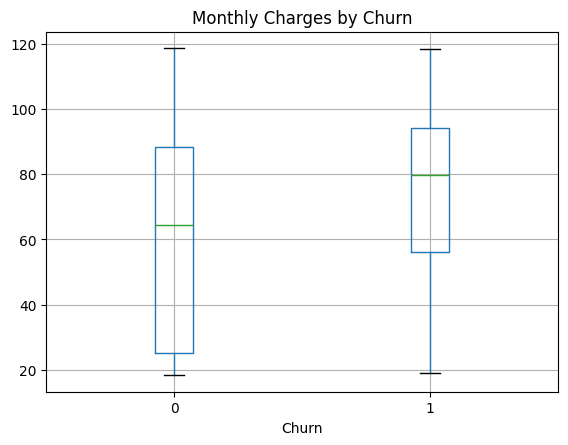

In [6]:
plt.figure()
eda_df.boxplot(column='MonthlyCharges', by='Churn')
plt.title('Monthly Charges by Churn')
plt.suptitle('')
plt.show()

## Contract Type Impact

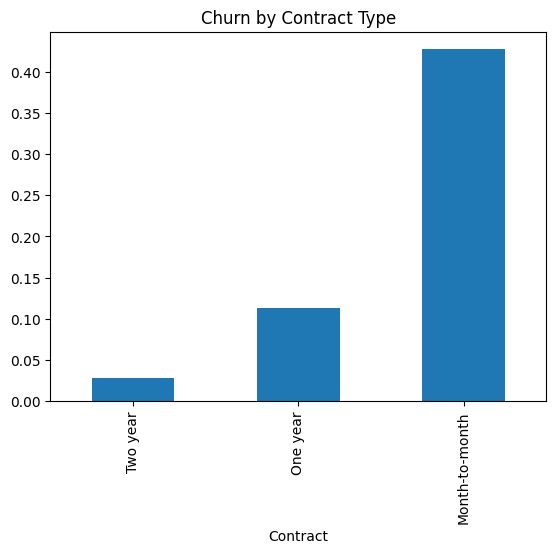

In [7]:
contract_churn = eda_df.groupby('Contract')['Churn'].mean().sort_values()

contract_churn.plot(kind='bar')
plt.title('Churn by Contract Type')
plt.show()

## Payment Method Risk

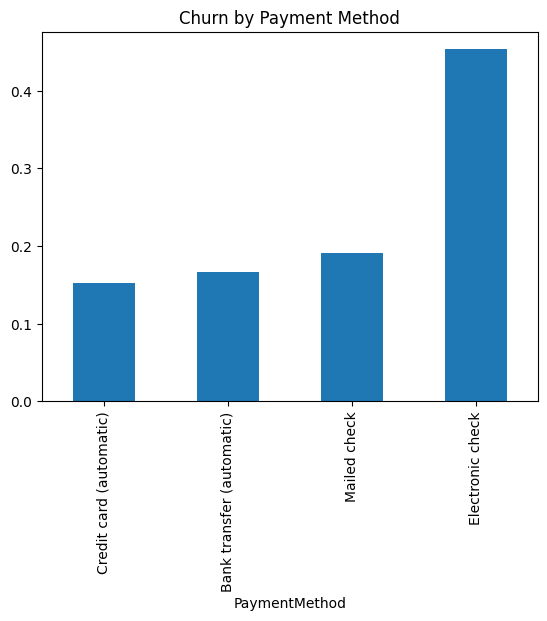

In [8]:
pay_churn = eda_df.groupby('PaymentMethod')['Churn'].mean().sort_values()

pay_churn.plot(kind='bar')
plt.title('Churn by Payment Method')
plt.show()

## Internet Sevice Impact

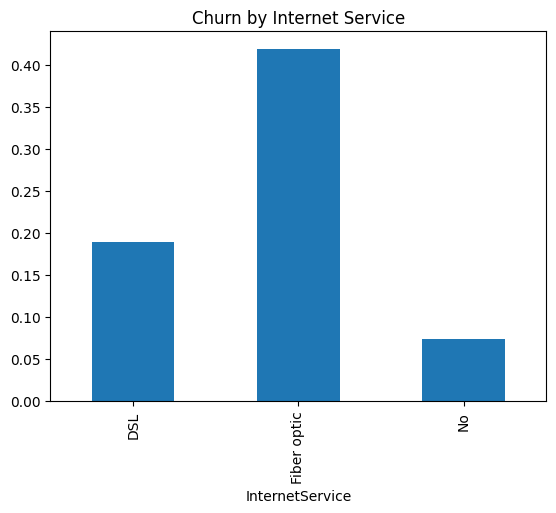

In [9]:
net_churn = eda_df.groupby('InternetService')['Churn'].mean()

net_churn.plot(kind='bar')
plt.title('Churn by Internet Service')
plt.show()

In [10]:
num_df = eda_df.select_dtypes(include=['int64','float64'])

num_df.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PhoneService        0.011942
Partner            -0.150448
Dependents         -0.164221
TotalCharges       -0.198324
tenure             -0.352229
Name: Churn, dtype: float64

- Tenure is the strongest churn predictor, indicating that early-stage customers are most vulnerable. Monthly charges and billing methods also contribute, suggesting price sensitivity and payment friction.

## Key Insights

- Customers with short tenure have significantly higher churn.
- Month-to-month contracts show the highest churn rates.
- Higher monthly charges correlate with increased churn.
- Electronic check users exhibit higher churn.

In [11]:
pd.crosstab(eda_df['Contract'], eda_df['Churn'], normalize='index') * 100

Churn,0,1
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


In [12]:
pd.crosstab(eda_df['PaymentMethod'], eda_df['Churn'], normalize='index') * 100

Churn,0,1
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700
